In [1]:
! pip install numpy scikit-learn pandas
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt

In [17]:

def stochastic_gradient_descent_lasso(X, y, lr=0.01, epochs=1000, lambda_=0.1):
    """
    Perform stochastic gradient descent with Lasso (L1) regularization.

    Parameters:
    X : numpy.ndarray
        Feature matrix (n_samples, n_features)
    y : numpy.ndarray
        Target values (n_samples,)
    lr : float, optional
        Learning rate (default is 0.01)
    epochs : int, optional
        Number of iterations (default is 1000)
    lambda_ : float, optional
        Regularization strength (default is 0.1)

    Returns:
    w : numpy.ndarray
        Learned weight vector
    b : float
        Learned bias term
    """
    n_samples, n_features = X.shape
    w = np.zeros(n_features)  # Initialize weights
    b = 0  # Initialize bias
    
    for epoch in range(epochs):
        for i in range(n_samples):
            idx = np.random.randint(0, n_samples)  # Select random sample
            X_i, y_i = X[idx], y[idx]
            
            y_pred = np.dot(X_i, w) + b
            error = y_pred - y_i
            
            # Compute gradients
            dw = (X_i * error) + (lambda_ * np.sign(w))  # L1 regularization term
            db = error
            
            # Update parameters
            w -= lr * dw
            b -= lr * db
    
    return w, b

train_data = pd.read_csv("./srcfiles/train_standardized.csv")
val_data = pd.read_csv("./srcfiles/validation_standardized.csv")

# Split features and target
X_train = train_data.iloc[:, :-1].values
y_train = train_data.iloc[:, -1].values
X_val = val_data.iloc[:, :-1].values
y_val = val_data.iloc[:, -1].values

w, b = stochastic_gradient_descent_lasso(X_train, y_train, lr=0.01, epochs=10, lambda_=0.5)
print("Learned Weights:", w)
print("Learned Bias:", b)

# Load test set from CSV
test_data = pd.read_csv("./srcfiles/test_standardized.csv")
X_test = test_data.iloc[:, :-1].values
y_test = test_data.iloc[:, -1].values

# Predict on test set
y_pred_test = np.dot(X_test, w) + b

# Calculate MSE and R^2 Score
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print("Test MSE:", mse)
print("Test R^2 Score:", r2)


Learned Weights: [ 0.00086493  0.31463956  0.00081246 -0.0032014  -0.00750073 -0.0030633
  0.00436927 -0.00299162]
Learned Bias: 0.055626626291274996
Test MSE: 0.4972310045989274
Test R^2 Score: 0.42492165447851604


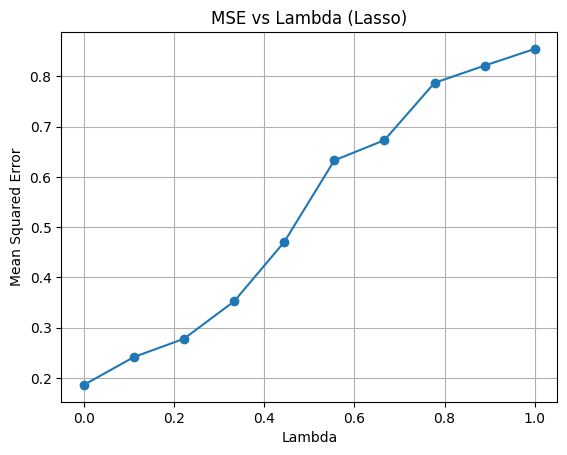

In [22]:
lambdas = np.linspace(0, 1, 10)
mse_values = []

for lambda_ in lambdas:
    w, b = stochastic_gradient_descent_lasso(X_train, y_train, lr=0.01, epochs=10, lambda_=lambda_)
    y_pred_test = np.dot(X_test, w) + b
    mse = mean_squared_error(y_test, y_pred_test)
    mse_values.append(mse)

# Plot MSE vs Lambda
plt.plot(lambdas, mse_values, marker='o')
plt.xlabel("Lambda")
plt.ylabel("Mean Squared Error")
plt.title("MSE vs Lambda (Lasso)")
plt.grid()
plt.show()
